<a href="https://colab.research.google.com/github/Princeton-CDH/simulating-risk/blob/main/notebooks/riskybet_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Risky bet simulation

## setup

install dependencies

In [1]:
# install forked version of mesa for now, to get local enhancements for jupyterviz
%%capture
%pip uninstall --no-input mesa
%pip install git+https://github.com/Princeton-CDH/mesa.git@expand-jupyterviz#egg=mesa
#%pip install git+https://github.com/Princeton-CDH/mesa.git@583f20beb7efb15b15758573555ce7e74f3c8333#egg=mesa

# install simulating risk code from github
%pip install git+https://github.com/Princeton-CDH/simulating-risk.git@main#egg=simulatingrisk

## run the simulation


In [2]:
from simulatingrisk.risky_bet.app import page


page

Html(layout=None, style_='display: none', tag='span')

Cannot show ipywidgets in text

## data analysis

Run preliminary data analysis on data collected by the model.

**NOTE**: Re-run this step after re-running the simulation to get the latest data

In [3]:
# get model data from the data collector
# page.args[0] == viz object;
model_df = page.args[0].model.datacollector.get_model_vars_dataframe()
# convert boolean payoff to 0/1 so we can more easily plot
model_df["risky_bet_i"] = model_df["risky_bet"].astype(int)
model_df

,prob_risky_payoff,risky_bet,risk_min,risk_q1,risk_mean,risk_q3,risk_max,risky_bet_i


### state of the world for this run

- what was the probability that the bet would pay off?  (blue trendline)
- when did it actually pay off? (orange bar indicates payoff)

In [4]:
import altair as alt

base = alt.Chart(model_df.reset_index()).mark_line().encode(
    x='index', # alt.X('index').title("round"),
    y='prob_risky_payoff',
).properties(
    width=800,
    height=200
)

actual_n = base.mark_bar(color="orange", opacity=0.7, width=3).encode(
    # x=alt.X('index').title("round"),
    y='risky_bet_i')
# combine the two charts vertically
alt.vconcat(base, actual_n.properties(width=800,height=50))

alt.VConcatChart(...)

### agent risk attitudes

In [10]:
# get agent data from model collected data
agent_df = page.args[0].model.datacollector.get_agent_vars_dataframe()
agent_df = agent_df.reset_index() # reset index so we can access by step
agent_df

,Step,AgentID,risk_level,choice
0,1,0,0.056868,Bet.RISKY
1,1,1,0.249539,Bet.RISKY
2,1,2,0.393241,Bet.RISKY
3,1,3,0.463799,Bet.RISKY
4,1,4,0.409122,Bet.RISKY
...,...,...,...,...
281595,704,395,0.918397,Bet.SAFE
281596,704,396,0.922623,Bet.SAFE
281597,704,397,0.913196,Bet.SAFE
281598,704,398,0.900144,Bet.SAFE


#### last round

what is the state of things at the last round run?

In [11]:
# get data for the last round
last_step_n = max(agent_df.Step)
last_step = agent_df[agent_df.Step == last_step_n]
last_step.head(10)

,Step,AgentID,risk_level,choice
281200,704,0,0.845070,Bet.SAFE
281201,704,1,0.845070,Bet.SAFE
281202,704,2,0.686226,Bet.SAFE
281203,704,3,0.845070,Bet.SAFE
281204,704,4,0.843879,Bet.SAFE
281205,704,5,0.845939,Bet.SAFE
281206,704,6,0.845070,Bet.SAFE
281207,704,7,0.686226,Bet.SAFE
281208,704,8,0.845939,Bet.SAFE
281209,704,9,0.918397,Bet.SAFE


What's the risk attitude distribution on the last round?

In [12]:
# describe risk level parameter
last_step.risk_level.describe()


count    400.000000
mean       0.880097
std        0.059203
min        0.686226
25%        0.845939
50%        0.900144
75%        0.913876
max        0.987498
Name: risk_level, dtype: float64

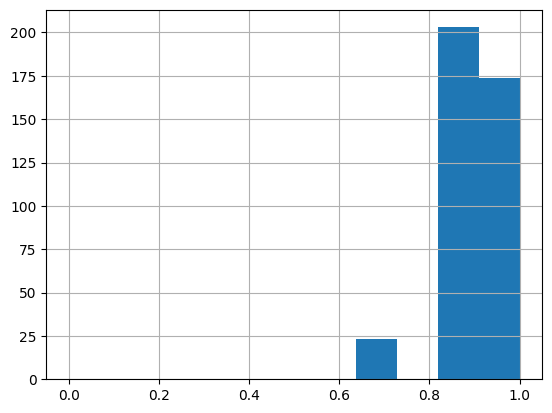

In [13]:
# plot a histogram of risk levels on the last round
import matplotlib.pylab as plt
%matplotlib inline

last_step.risk_level.hist(range=[0,1], bins=11)
plt.show()

#### multiple rounds

plot agent risk levels across rounds periodically

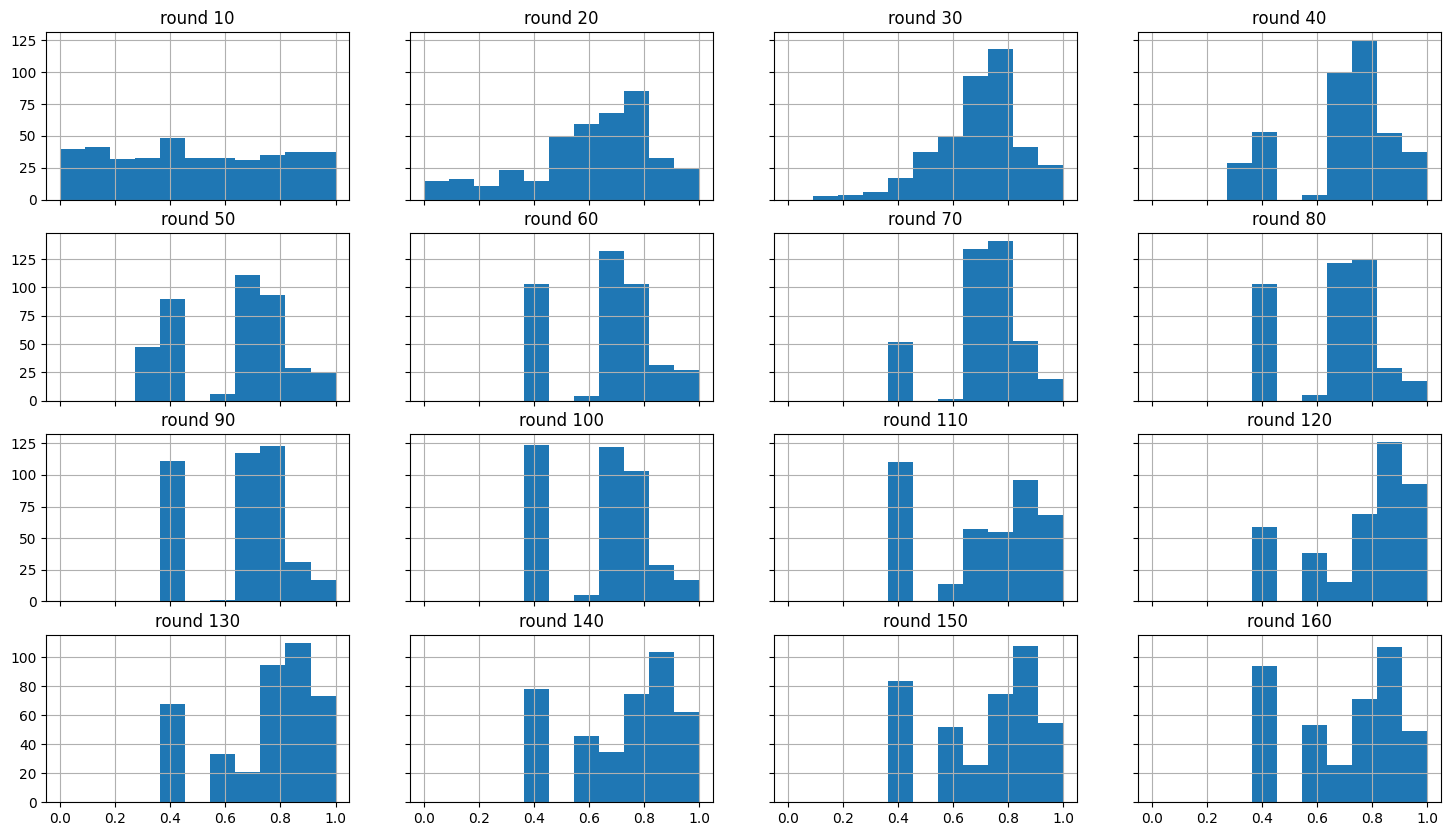

In [14]:
import matplotlib.pyplot as plt
# create a grid to plot multiple rounds
fig, ax = plt.subplots(ncols=4, nrows=4, sharex='col', sharey='row', figsize=(18,10))

# try plotting every 10 rounds
max_plots = 4 * 4

# iterate by tens starting with 10
for i, round in enumerate(range(10, last_step_n, 10)):
    if i >= max_plots:  # don't go beyond what our subplot grid can handle
      break
    round_data = agent_df[agent_df.Step == round]
    plot_location = ax[int(i/4), int(i % 4)]
    round_data.risk_level.hist(ax=plot_location, range=[0,1], bins=11)
    plot_location.set_title("round %d" % (round,))
